In [2]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import df2img
from datetime import date
from datetime import datetime

# my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve
import mean_rev_utl as mru

## Importing and processing data

In [5]:
#main

list_securities = ['SSO', 'TLT']

data = hep.create_dataframe_polygon(list_securities)
unique_name = 'singal_strategy'
for i in list_securities:
        unique_name += '_' + i
    

In [65]:
signal_df = mru.create_mean_rev_signal(data, 50, 10)[0]
df_rolling_mean = mru.create_mean_rev_signal(data, 80, 20)[1]
data_r = data.div(data.shift(1))-1 #returns of securities

data_earnings = hep.df_earnings(signal_df, data_r) #compute the earnings 
data_earnings.dropna(inplace = True)

In [8]:
data_earnings

SSO       TLT       Tot
timestamp                                              
2012-10-31 00:00:00-04:00 -0.003234 -0.005871 -0.009105
2012-11-01 00:00:00-04:00  0.024717  0.008187  0.032905
2012-11-02 00:00:00-04:00 -0.018294  0.000736 -0.017558
2012-11-05 00:00:00-05:00  0.004228 -0.005644 -0.001415
2012-11-06 00:00:00-05:00  0.014845  0.009435  0.024280
...                             ...       ...       ...
2022-06-27 00:00:00-04:00  0.007073  0.008529  0.015602
2022-06-28 00:00:00-04:00  0.041064 -0.004659  0.036405
2022-06-29 00:00:00-04:00  0.002403 -0.015608 -0.013205
2022-06-30 00:00:00-04:00  0.016645 -0.008782  0.007863
2022-07-01 00:00:00-04:00 -0.020935 -0.008270 -0.029206

[2434 rows x 3 columns]

## Exploring the result

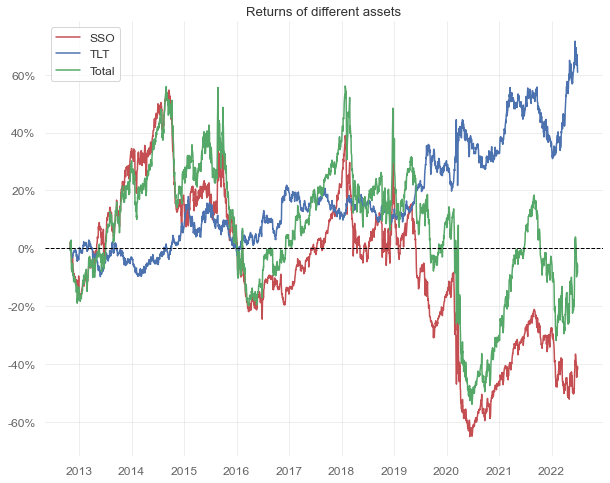

In [12]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Returns of different assets')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(data_earnings['SSO']), lw=1.5, label='SSO', color='r', alpha=1)
ax.plot(compsum(data_earnings['TLT']), lw=1.5, label='TLT', color='b', alpha=1)
ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig.savefig('../img/return_different_asset_SSO_TLT.png')

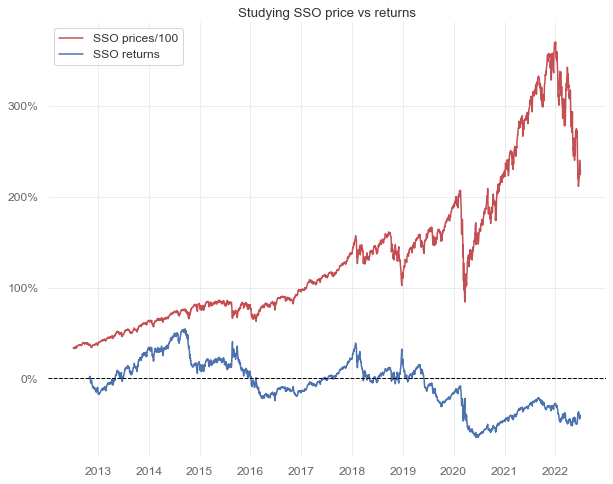

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Studying SSO price vs returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(data['SSO']* 0.05, lw=1.5, label='SSO prices/100', color='r', alpha=1) 
ax.plot(compsum(data_earnings['SSO']), lw=1.5, label='SSO returns', color='b', alpha=1)
#ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig.savefig('../img/SSO_price_vs_returns_mr_startegy.png')

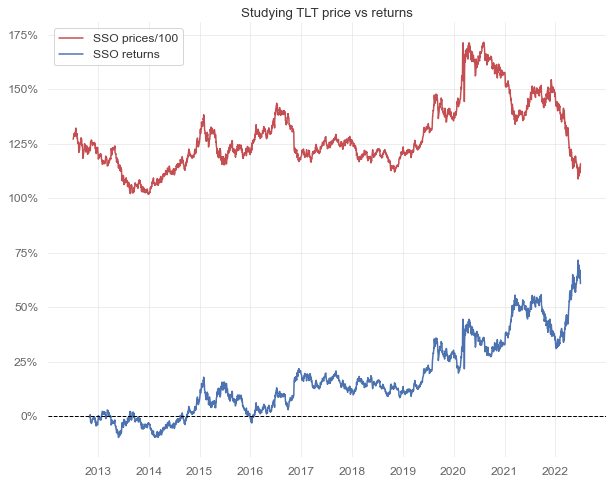

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Studying TLT price vs returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(data['TLT']* 0.01, lw=1.5, label='SSO prices/100', color='r', alpha=1) 
ax.plot(compsum(data_earnings['TLT']), lw=1.5, label='SSO returns', color='b', alpha=1)
#ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
#fig.savefig('../img/TLT_price_vs_returns_mr_startegy.png')

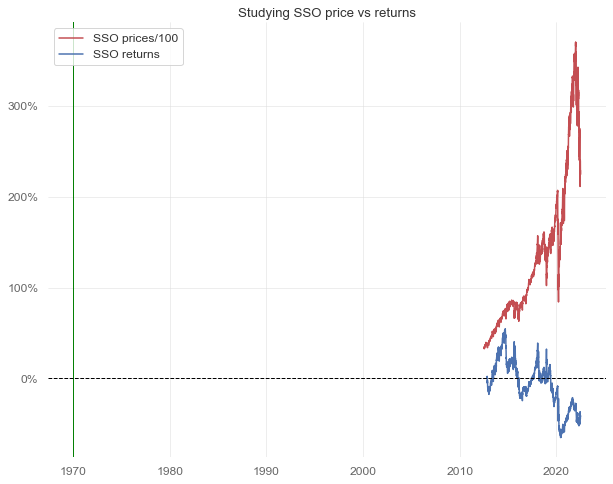

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Studying SSO price vs returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(data['SSO']* 0.05, lw=1.5, label='SSO prices/100', color='r', alpha=1) 
ax.plot(compsum(data_earnings['SSO']), lw=1.5, label='SSO returns', color='b', alpha=1)
#ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)


#ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax.fill_between(data['SSO'][79:]* 0.05,2, where= signal_df['SSO'] == 1 ,
                color='green', alpha=0.2, transform=ax.get_xaxis_transform())
#fig.savefig('../img/SSO_price_vs_returns_mr_startegy.png')

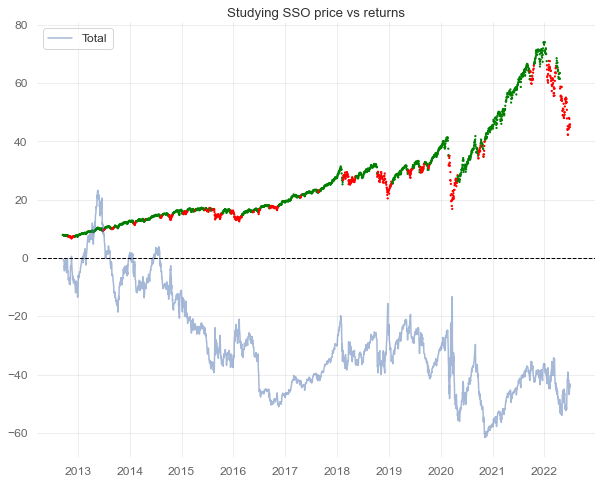

In [66]:
#data, signal_dfù
import matplotlib as mpl
data_scatter = data.copy()
data_scatter['SSO_color'] = signal_df['SSO']
data_scatter['TLT_color'] = signal_df['TLT']
data_scatter.dropna()

#plt.scatter(data_scatter.index, data_scatter['SSO'], c = data_scatter['SSO_color'], cmap = mpl.colors.ListedColormap(['red', 'green']), s = 1.5)

# Labelling 


fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Studying SSO price vs returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.scatter(data_scatter.index, data_scatter['SSO'], c = data_scatter['SSO_color'], 
           cmap = mpl.colors.ListedColormap(['red', 'green']), s = 1.5)
ax.plot(compsum(data_earnings['SSO'])*100, lw=1.5, label='Total', color='b', alpha=0.5)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
#ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
#fig.savefig('../img/SSO_price_vs_returns_mr_startegy.png')

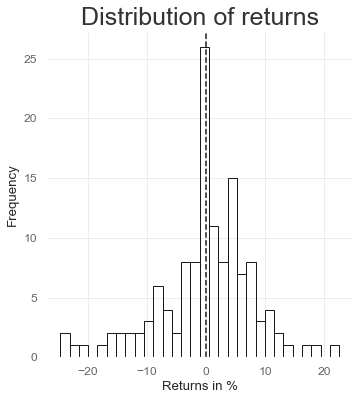

In [16]:
returns = monthly_returns(data_earnings['SSO'], eoy=False,compounded=True) * 100

series = pd.Series(dtype = 'float64')
for column in returns.columns:
    series = pd.concat([series,returns[column]])
#distribution(returns)
ax = series.plot.hist(bins = 30, edgecolor='k',fill=False)
ax.set_title('Distribution of returns', size = 25)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel("Returns in %")
ax.set_ylabel("Frequency")
fig = ax.get_figure()
fig.set_size_inches(5.5,6)
fig.savefig('../img/temp/distribution_returns' + unique_name + '.png')
fig_distribution = fig